<a href="https://colab.research.google.com/github/Madathanapalleleena/ML_LAB_152/blob/main/ML_wrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS, ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X.columns)

In [ ]:
print(x_test_scaled.shape)

(54, 13)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [ ]:
sfs = SFS(clf,k_features=5,forward=True,floating=False,scoring='accuracy',cv=3, n_jobs=-1)

print("Starting SFS...")
sfs = sfs.fit(x_train_scaled, y_train)

print("SFS selected features:", sfs.k_feature_names_)
print("SFS best accuracy score: %.4f" % sfs.k_score_)
sfs_features_train = sfs.transform(x_train_scaled)
sfs_features_test = sfs.transform(x_test_scaled)
clf.fit(sfs_features_train, y_train)
print("SFS Test Accuracy: %.4f" % clf.score(sfs_features_test, y_test))

Starting SFS...
SFS selected features: ('0', '1', '3', '6', '9')
SFS best accuracy score: 0.9760
SFS Test Accuracy: 0.9074


In [ ]:
bfs = SFS(clf,k_features=5,forward=False,floating=False,scoring='accuracy',cv=3,n_jobs=-1)

print("Starting BFS...")
bfs = bfs.fit(x_train_scaled, y_train)

print("BFS selected features:", bfs.k_feature_names_)
print("BFS best accuracy score: %.4f" % bfs.k_score_)
bfs_features_train = bfs.transform(x_train_scaled)
bfs_features_test = bfs.transform(x_test_scaled)
clf.fit(bfs_features_train, y_train)
print("BFS Test Accuracy: %.4f" % clf.score(bfs_features_test, y_test))

Starting BFS...
BFS selected features: ('0', '2', '4', '6', '9')
BFS best accuracy score: 0.9599
BFS Test Accuracy: 0.9630


In [ ]:
efs = EFS(clf, min_features=1,max_features=4,scoring='accuracy', cv=3,n_jobs=-1)
print("\nStarting Exhaustive Feature Selector...")
efs = efs.fit(x_train_scaled, y_train)

print("Exhaustive best features:", efs.best_feature_names_)
print("Exhaustive best accuracy score: %.4f" % efs.best_score_)
efs_features_train = efs.transform(x_train_scaled)
efs_features_test = efs.transform(x_test_scaled)
clf.fit(efs_features_train, y_train)
print("EFS Test Accuracy: %.4f" % clf.score(efs_features_test, y_test))


Starting Exhaustive Feature Selector...


Features: 1092/1092

Exhaustive best features: ('0', '4', '6', '10')
Exhaustive best accuracy score: 0.9758
EFS Test Accuracy: 0.9074


In [ ]:
rfe = RFE(estimator=clf, n_features_to_select=5)

print("Starting RFE..")
rfe.fit(x_train_scaled, y_train)

print("\nRFE selected features:", X.columns[rfe.support_].tolist())
rfe_features_train = rfe.transform(x_train_scaled)
rfe_features_test = rfe.transform(x_test_scaled)
clf.fit(rfe_features_train, y_train)
print("RFE Test Accuracy: %.4f" % clf.score(rfe_features_test, y_test))

Starting RFE..

RFE selected features: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
RFE Test Accuracy: 1.0000


In [ ]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

clf.fit(x_train_pca, y_train)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("PCA Test Accuracy: %.4f" % clf.score(x_test_pca, y_test))


PCA explained variance ratio: [0.35730453 0.19209164 0.11006755 0.07250719 0.06973166]
PCA Test Accuracy: 0.9444


In [ ]:
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda = lda.transform(x_test_scaled)

clf.fit(x_train_lda, y_train)

print("LDA shape:", x_train_lda.shape)
print("LDA Test Accuracy: %.4f" % clf.score(x_test_lda, y_test))


LDA shape: (124, 2)
LDA Test Accuracy: 0.9630


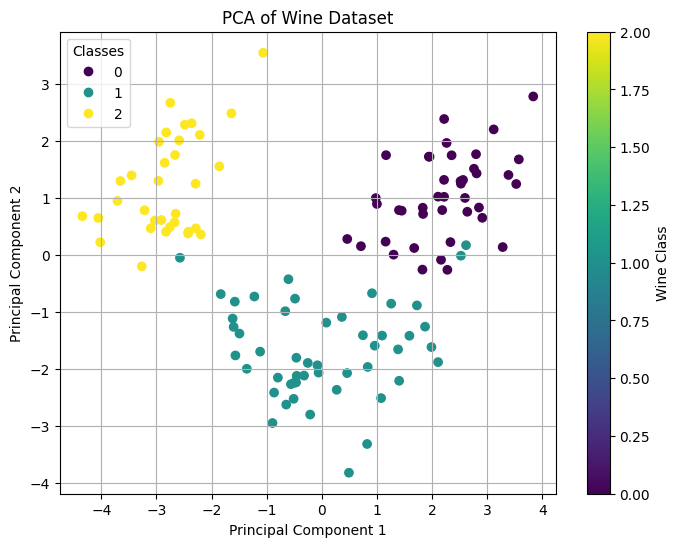

In [21]:
import matplotlib.pyplot as plt

# Assuming x_train_pca contains the PCA transformed data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.colorbar(scatter, label='Wine Class')
plt.grid(True)
plt.show()

In [22]:
from google.colab import files
uploaded=files.upload()

Saving house_price_train.csv to house_price_train.csv


In [40]:
import pandas as pd
df=pd.read_csv("house_price_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [41]:
df.fillna(df.mean(numeric_only=True),inplace=True)
df.fillna({col: df[col].mode()[0] for col in df.select_dtypes(include='object').columns}, inplace=True) #for categorical data

In [42]:
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [43]:
print(df.isnull().values.any())

False


In [44]:
constant_features=[]
x_train,x_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3,random_state=42)
constant_features=[col for col in x_test.columns if x_test[col].nunique()==1]
print(constant_features)

['Utilities']


In [45]:
quasi_feature=[]
for col in x_train.columns:
  predominant=(x_train[col].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>=0.99:
    quasi_feature.append(col)
print(quasi_feature)

['Street', 'Utilities', 'Condition2', 'PoolArea', 'PoolQC', 'MiscFeature']


In [46]:
df.drop(labels=quasi_feature,axis=1,inplace=True)

In [49]:
x_train.drop(labels=quasi_feature,axis=1,inplace=True)
x_test.drop(labels=quasi_feature,axis=1,inplace=True)

In [47]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Keep one of the two correlated columns
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train.select_dtypes(include=['number']), 0.8)
correlated_features = set(corr_features)
print(correlated_features)

{'1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'}


In [48]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

In [50]:
x_train = x_train.select_dtypes(exclude=['object'])
x_test = x_test.select_dtypes(exclude=['object'])

In [52]:
print(x_train.columns) #performing only on numeric columns (lr)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [53]:
x_train.drop(labels=['Id'],axis=1,inplace=True)
x_test.drop(labels=['Id'],axis=1,inplace=True)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print("Intercept:", lr_model.intercept_)
print("Slope:", lr_model.coef_)  #Each slope corresponds to a feature

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Intercept: -530122.0450025548
Slope: [-2.36198484e+02 -1.30804089e+02  4.33444745e-01  1.90698136e+04
  3.06079151e+03  2.39615041e+02  1.97234317e+02  2.09683971e+01
  6.89596295e+00 -3.48119153e+00 -1.33839337e+00  2.07637804e+00
  9.65468508e-01 -1.03832641e+00  5.18797959e+01  1.25361121e+04
 -7.64260487e+02  4.32215205e+03 -1.47363040e+03 -5.47624046e+03
 -2.75523957e+03  5.66326702e+03  1.10200211e+02  1.34296970e+04
  2.00348510e+01 -2.12058472e+01 -3.17088848e+00  4.36243842e+01
  6.77376245e+01 -1.36936889e+00 -4.05427713e+01 -2.96086549e+02]
Mean Squared Error (MSE): 1254720892.2150998
Mean Absolute Error (MAE): 23046.534910861916
Root Mean Squared Error (RMSE): 35422.03963939824
